In [1]:

#Importing the library
import matplotlib.pyplot as plt
import networkx as nx 
import random
import numpy as np


def qvotermodel(G, N, p, q):
    
    """"The function returns the propbabilty and the spinsons decisions whneter it is independence or conformity
    -========================================================================================================
    
    PARAMETERS
    
    G= The network graph
    N= The number of simulations
    P= Probability to decide whether the decision will be independent or not
    
    """
    
    
    pos=nx.spring_layout(G)
    magforprob = []
    for prob in p:
        magformonsim = []
        for simul in range(NN):
            spinsons = G.nodes()
            state = []
            st = np.random.choice([-1, 1], size=len(G.nodes()))
            for value in st:
                state.append(value)
            magfornodsim = [] 
            for nodesim in range(len(G.nodes())):
                voter = np.random.choice(spinsons)
                voterindex = voter
                gp = random.random()
                if gp < prob:
                    state[voterindex] = -1 * state[voterindex]
                else:
                    neighvote = []
                    for node in G.neighbors(voter):
                        neighvote.append(node)
                    neighvoters=np.random.choice(neighvote,q)
                    neighindex=[]
                    negone = 0
                    posone = 0
                    negneighvoters=[]
                    posneighvoters=[]
                    sume = 0
                    for node in neighvoters:
                        sume = sume + state[node]
                    if sume == q:
                        state[voterindex] = 1
                    elif sume == (-1*q):
                        state[voterindex] = -1
                magfornodsim.append(sume)
                voterl = [voter]
            magformonsim.append(sum(magfornodsim)/len(G.nodes()))
        magforprob.append(np.mean(magformonsim))
    return (p,magforprob)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:640: UserWarning: Unrecognized location "1". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


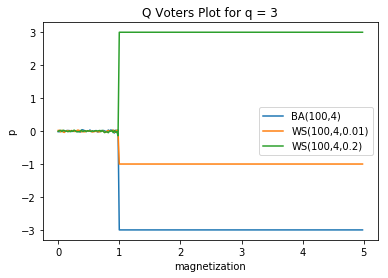

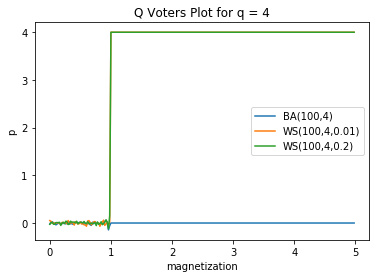

In [3]:
directory = '/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List6/Images'

qq=[3,4]
#Creating each graph
G1 = nx.barabasi_albert_graph(100,4)
G2 = nx.watts_strogatz_graph(100, 4, 0.01)
G3 = nx.watts_strogatz_graph(100, 4, 0.2)
Graph = [G1,G2,G3]
#The probabilities
p = [prob for prob in np.arange(0.0, 5.0, 0.02)]
NN=1000
GraphName=['BA(100,4)','WS(100,4,0.01)','WS(100,4,0.2)']

#creating a qvotermodel
i=0
for G in Graph:
    q=3
    result=qvotermodel(G, NN, p, q)
    plt.plot(result[0],result[1],label=GraphName[i])
    i+=1
plt.title('Q Voters Plot for q = {}'.format(q))
plt.xlabel('magnetization')
plt.ylabel('p')
plt.legend(loc='1')
plt.savefig(directory + 'Q-Voters with q ='+str(q)+'.png')
plt.show()

i=0
for G in Graph:
    q=4
    result=qvotermodel(G, NN, p, q)
    plt.plot(result[0],result[1],label=GraphName[i])
    i+=1
plt.title('Q Voters Plot for q = {}'.format(q))
plt.xlabel('magnetization')
plt.ylabel('p')
plt.legend(loc='1')
plt.savefig(directory + 'Q-Voters with q ='+str(q)+'.png')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:640: UserWarning: Unrecognized location "1". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


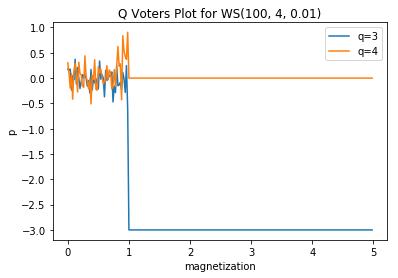

In [4]:
#Doing the same for NN=10
directory = '/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List6/Images'
qq=[3,4]
G = nx.watts_strogatz_graph(100, 4, 0.01)
p = [prob for prob in np.arange(0.0, 5.0, 0.02)]
NN=10
for q in qq:    
    result=qvotermodel(G, NN, p, q)
    labe = 'q='+str(q)
    plt.plot(result[0],result[1],label=labe)
plt.title('Q Voters Plot for WS(100, 4, 0.01)')
plt.xlabel('magnetization')
plt.ylabel('p')
plt.legend(loc='1')
plt.savefig(directory + 'Q Voters Plot for WS(100, 4, 0.01).png')
plt.show()